# Example notebook

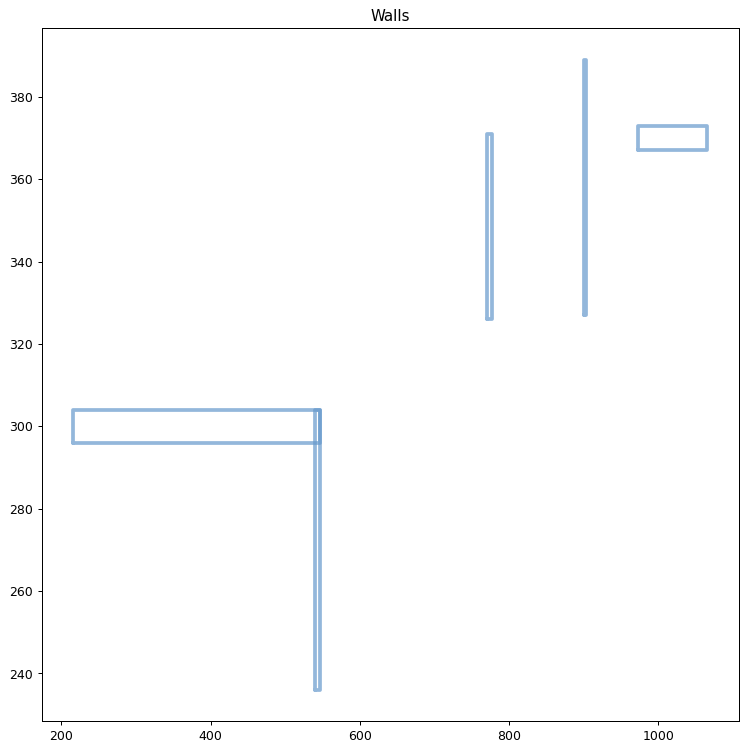

In [28]:
%matplotlib inline
from dotenv import load_dotenv
load_dotenv()

from skimage import transform
import numpy as np
import logging
import os
import json
from operator import itemgetter
from shapely.geometry import MultiPolygon, Polygon

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from floortrans.models import get_model
from floortrans.loaders import ImageLoader, FloorplanSVG, DictToTensor, Compose, RotateNTurns
from floortrans.plotting import segmentation_plot, polygons_to_image, polygons_to_json, draw_junction_from_dict, discrete_cmap
discrete_cmap()
from floortrans.post_prosessing import split_prediction, get_polygons, split_validation
from floortrans.metrics import get_evaluation_tensors, runningScore
from tqdm import tqdm

from mpl_toolkits.axes_grid1 import AxesGrid
from IPython.display import Image
from IPython.core.display import HTML 

path = "C:/Users/JackChua/Projects/Floorplan/CubiCasa5k/data/output/example/data.json"
file = open(path)
params = json.load(file)

id, polygons, types, room_polygons, room_types = itemgetter('id', 'polygons', 'types', 'room_polygons', 'room_types')(params)

fig = plt.figure(1, figsize=(10,10), dpi=90)
ax = fig.add_subplot(111)
ax.set_title('Walls')

pol_vals = []
# for i in range(0, len(polygons)):
for i in range(0, 5):
    [*pol_a] = polygons[i]
    pol_a.append(pol_a[0])
    pol_b = Polygon(pol_a)
    pol_vals.append(pol_b)
    x, y = pol_b.exterior.xy
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)

